In [277]:
import numpy as np
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import seaborn as sns

In [278]:
url = "https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/nyc_taxi.csv"
df = pd.read_csv(url)
df

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820
...,...,...
10315,2015-01-31 21:30:00,24670
10316,2015-01-31 22:00:00,25721
10317,2015-01-31 22:30:00,27309
10318,2015-01-31 23:00:00,26591


In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  10320 non-null  object
 1   value      10320 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 161.4+ KB


In [280]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  10320 non-null  datetime64[ns]
 1   value      10320 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 161.4 KB


In [281]:
df.set_index('timestamp')

,value
timestamp,
2014-07-01 00:00:00,10844
2014-07-01 00:30:00,8127
2014-07-01 01:00:00,6210
2014-07-01 01:30:00,4656
2014-07-01 02:00:00,3820
...,...
2015-01-31 21:30:00,24670
2015-01-31 22:00:00,25721
2015-01-31 22:30:00,27309


In [282]:
df = df.set_index('timestamp').resample('H').sum().reset_index()
df

,timestamp,value
0,2014-07-01 00:00:00,18971
1,2014-07-01 01:00:00,10866
2,2014-07-01 02:00:00,6693
3,2014-07-01 03:00:00,4433
4,2014-07-01 04:00:00,4379
...,...,...
5155,2015-01-31 19:00:00,56577
5156,2015-01-31 20:00:00,48276
5157,2015-01-31 21:00:00,48389
5158,2015-01-31 22:00:00,53030


In [283]:
df['timestamp'].dt.hour

0        0
1        1
2        2
3        3
4        4
        ..
5155    19
5156    20
5157    21
5158    22
5159    23
Name: timestamp, Length: 5160, dtype: int32

In [284]:
df.timestamp.dt.strftime?

Signature: df.timestamp.dt.strftime(*args, **kwargs)
Docstring:
Convert to Index using specified date_format.

Return an Index of formatted strings specified by date_format, which
supports the same string format as the python standard library. Details
of the string format can be found in `python string format
doc <https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior>`__.

Formats supported by the C `strftime` API but not by the python string format
doc (such as `"%R"`, `"%r"`) are not officially supported and should be
preferably replaced with their supported equivalents (such as `"%H:%M"`,
`"%I:%M:%S %p"`).

Note that `PeriodIndex` support additional directives, detailed in
`Period.strftime`.

Parameters
----------
date_format : str
    Date format string (e.g. "%Y-%m-%d").

Returns
-------
ndarray[object]
    NumPy ndarray of formatted strings.

See Also
--------
to_datetime : Convert the given argument to datetime.
DatetimeIndex.normalize : Return DatetimeI

In [285]:
df['timestamp'].dt.strftime('%A')

0        Tuesday
1        Tuesday
2        Tuesday
3        Tuesday
4        Tuesday
          ...   
5155    Saturday
5156    Saturday
5157    Saturday
5158    Saturday
5159    Saturday
Name: timestamp, Length: 5160, dtype: object

In [286]:
df['hour'] = df['timestamp'].dt.hour
df['weekday'] = df['timestamp'].dt.strftime('%A')
df

,timestamp,value,hour,weekday
0,2014-07-01 00:00:00,18971,0,Tuesday
1,2014-07-01 01:00:00,10866,1,Tuesday
2,2014-07-01 02:00:00,6693,2,Tuesday
3,2014-07-01 03:00:00,4433,3,Tuesday
4,2014-07-01 04:00:00,4379,4,Tuesday
...,...,...,...,...
5155,2015-01-31 19:00:00,56577,19,Saturday
5156,2015-01-31 20:00:00,48276,20,Saturday
5157,2015-01-31 21:00:00,48389,21,Saturday
5158,2015-01-31 22:00:00,53030,22,Saturday


<Axes: xlabel='weekday'>

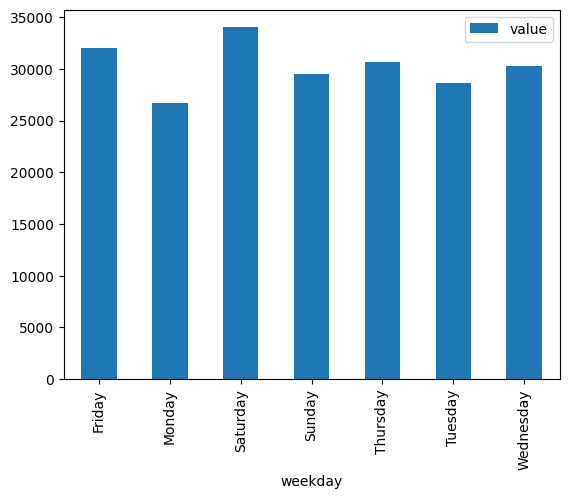

In [287]:
df[['value', 'weekday']].groupby('weekday').mean().plot(kind='bar')

<Axes: xlabel='hour'>

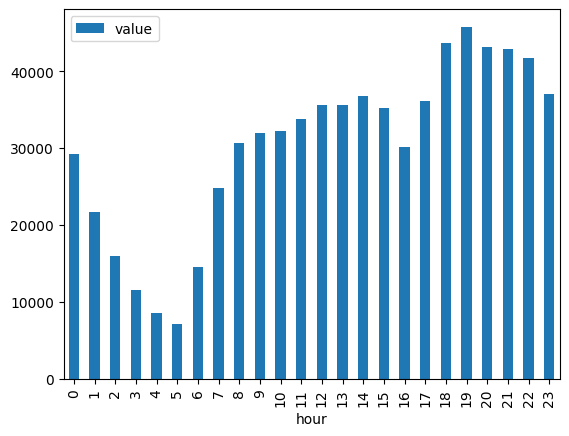

In [288]:
df[['value', 'hour']].groupby('hour').mean().plot(kind='bar')

(array([16252., 16283., 16314., 16344., 16375., 16405., 16436., 16467.]),
 [Text(16252.0, 0, '2014-07'),
  Text(16283.0, 0, '2014-08'),
  Text(16314.0, 0, '2014-09'),
  Text(16344.0, 0, '2014-10'),
  Text(16375.0, 0, '2014-11'),
  Text(16405.0, 0, '2014-12'),
  Text(16436.0, 0, '2015-01'),
  Text(16467.0, 0, '2015-02')])

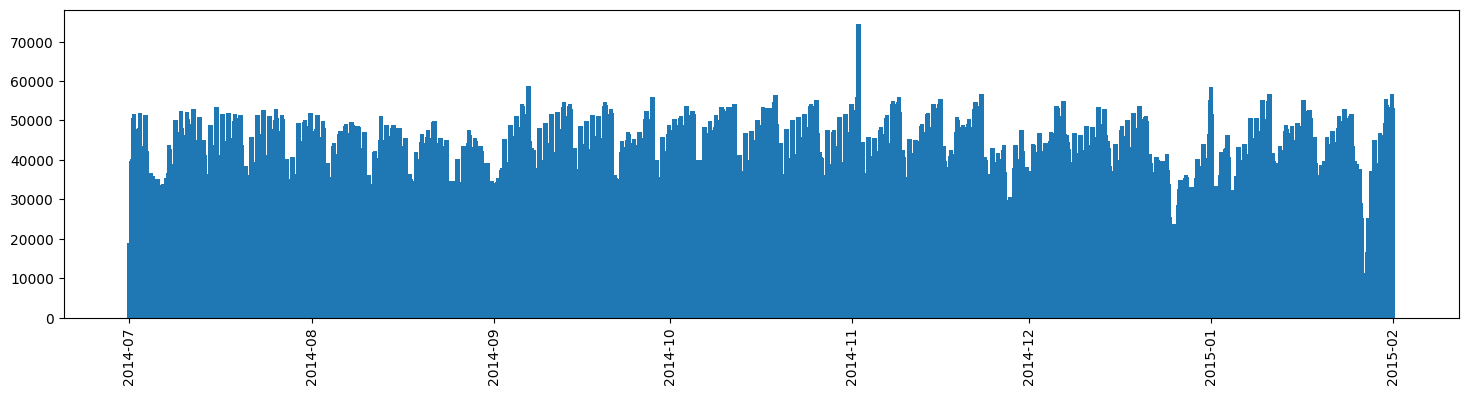

In [289]:
plt.figure(figsize=(18, 4))
plt.bar(df['timestamp'], df['value'])
plt.xticks(rotation=90)

<Axes: xlabel='timestamp'>

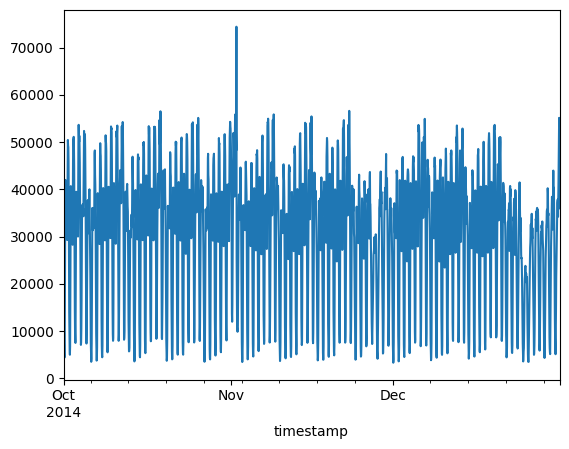

In [290]:
series = df.set_index('timestamp').loc['2014-10': '2014-12']['value']
series.plot()

<Axes: xlabel='timestamp'>

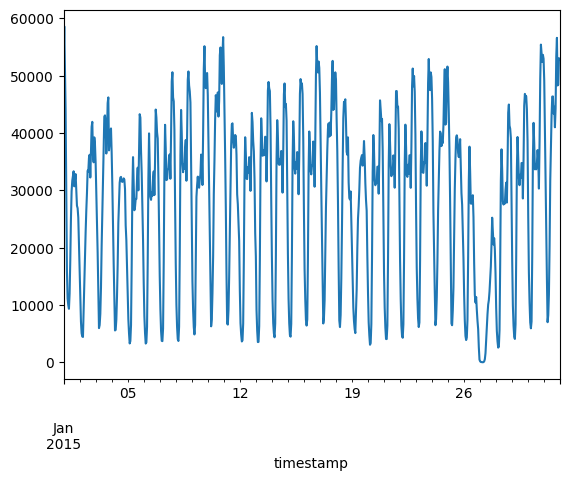

In [291]:
series = df.set_index('timestamp').loc['2015-01': '2015-02']['value']
series.plot()

In [292]:
model = IsolationForest(n_estimators=500, contamination=0.004, random_state=0)
model.fit(df[['value', 'hour']].values)

IsolationForest(contamination=0.004, n_estimators=500, random_state=0)

In [293]:
pred = model.predict(df[['value', 'hour']].values)

In [294]:
from collections import Counter

np.unique(pred), Counter(pred)

(array([-1,  1]), Counter({1: 5139, -1: 21}))

In [295]:
pred.shape

(5160,)

In [296]:
df['outliers'] = pd.Series(pred).apply(lambda p: 'yes' if p == -1 else 'no')
df

,timestamp,value,hour,weekday,outliers
0,2014-07-01 00:00:00,18971,0,Tuesday,no
1,2014-07-01 01:00:00,10866,1,Tuesday,no
2,2014-07-01 02:00:00,6693,2,Tuesday,no
3,2014-07-01 03:00:00,4433,3,Tuesday,no
4,2014-07-01 04:00:00,4379,4,Tuesday,no
...,...,...,...,...,...
5155,2015-01-31 19:00:00,56577,19,Saturday,no
5156,2015-01-31 20:00:00,48276,20,Saturday,no
5157,2015-01-31 21:00:00,48389,21,Saturday,no
5158,2015-01-31 22:00:00,53030,22,Saturday,no


In [297]:
df[df['outliers'] == 'yes']

,timestamp,value,hour,weekday,outliers
1631,2014-09-06 23:00:00,58837,23,Saturday,yes
1800,2014-09-14 00:00:00,52947,0,Sunday,yes
1968,2014-09-21 00:00:00,51938,0,Sunday,yes
2136,2014-09-28 00:00:00,53589,0,Sunday,yes
2472,2014-10-12 00:00:00,52010,0,Sunday,yes
2640,2014-10-19 00:00:00,54293,0,Sunday,yes
2808,2014-10-26 00:00:00,53120,0,Sunday,yes
2977,2014-11-02 01:00:00,74409,1,Sunday,yes
3144,2014-11-09 00:00:00,52139,0,Sunday,yes
3312,2014-11-16 00:00:00,51863,0,Sunday,yes


In [298]:
df.query('outliers == "yes"')

,timestamp,value,hour,weekday,outliers
1631,2014-09-06 23:00:00,58837,23,Saturday,yes
1800,2014-09-14 00:00:00,52947,0,Sunday,yes
1968,2014-09-21 00:00:00,51938,0,Sunday,yes
2136,2014-09-28 00:00:00,53589,0,Sunday,yes
2472,2014-10-12 00:00:00,52010,0,Sunday,yes
2640,2014-10-19 00:00:00,54293,0,Sunday,yes
2808,2014-10-26 00:00:00,53120,0,Sunday,yes
2977,2014-11-02 01:00:00,74409,1,Sunday,yes
3144,2014-11-09 00:00:00,52139,0,Sunday,yes
3312,2014-11-16 00:00:00,51863,0,Sunday,yes


(array([16314., 16344., 16375., 16405., 16436., 16467.]),
 [Text(16314.0, 0, '2014-09'),
  Text(16344.0, 0, '2014-10'),
  Text(16375.0, 0, '2014-11'),
  Text(16405.0, 0, '2014-12'),
  Text(16436.0, 0, '2015-01'),
  Text(16467.0, 0, '2015-02')])

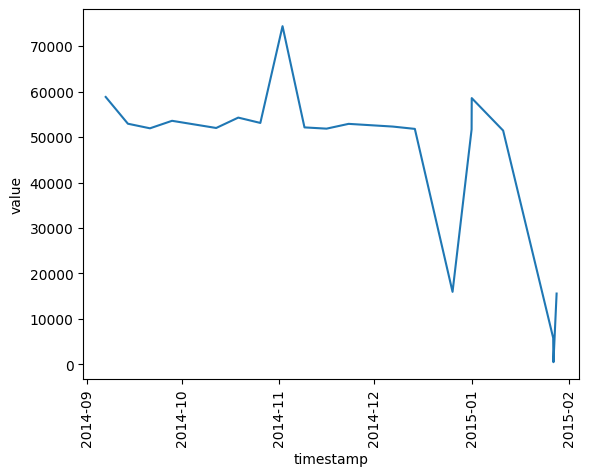

In [299]:
sns.lineplot(x='timestamp', y='value', data=df.query('outliers == "yes"'))
plt.xticks(rotation=90)

<Axes: >

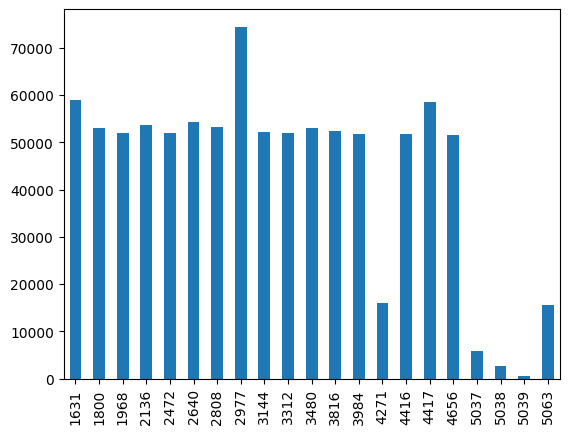

In [302]:
df.query('outliers == "yes"')['value'].plot(kind='bar')

In [303]:
model = IsolationForest(n_estimators=500, random_state=0)
model.fit(df[['value', 'hour']])

IsolationForest(n_estimators=500, random_state=0)

In [304]:
score = model.decision_function(df[['value', 'hour']])
score

array([-0.06047915, -0.02974712, -0.00808499, ..., -0.00387494,
       -0.08516736, -0.11697285])

Text(0, 0.5, 'frequency')

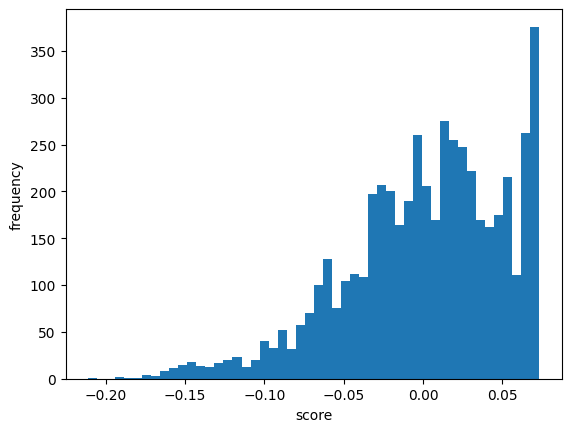

In [305]:
plt.hist(score, bins=50)
plt.xlabel('score')
plt.ylabel('frequency')

In [306]:
df['score'] = score
df

,timestamp,value,hour,weekday,outliers,score
0,2014-07-01 00:00:00,18971,0,Tuesday,no,-0.060479
1,2014-07-01 01:00:00,10866,1,Tuesday,no,-0.029747
2,2014-07-01 02:00:00,6693,2,Tuesday,no,-0.008085
3,2014-07-01 03:00:00,4433,3,Tuesday,no,-0.019942
4,2014-07-01 04:00:00,4379,4,Tuesday,no,-0.009827
...,...,...,...,...,...,...
5155,2015-01-31 19:00:00,56577,19,Saturday,no,-0.107111
5156,2015-01-31 20:00:00,48276,20,Saturday,no,0.006210
5157,2015-01-31 21:00:00,48389,21,Saturday,no,-0.003875
5158,2015-01-31 22:00:00,53030,22,Saturday,no,-0.085167


In [307]:
df.query('score < -0.175 and outliers == "yes"')

,timestamp,value,hour,weekday,outliers,score
2136,2014-09-28 00:00:00,53589,0,Sunday,yes,-0.175949
2640,2014-10-19 00:00:00,54293,0,Sunday,yes,-0.179793
2977,2014-11-02 01:00:00,74409,1,Sunday,yes,-0.190897
4417,2015-01-01 01:00:00,58584,1,Thursday,yes,-0.185157
5038,2015-01-26 22:00:00,2649,22,Monday,yes,-0.192063
5039,2015-01-26 23:00:00,486,23,Monday,yes,-0.210913
